# PROJET SUR LA MODELISATION D'UNE SERIE TEMPORELLE SUR PYTHON

## Installation et importation des packages 

In [1]:
#!pip install seaborn

In [2]:
#!pip install datetime

In [3]:
#importation des bibliothèques
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données et Nettoyage de la base des données

In [4]:
# importation du dataset
data = pd.read_csv(r"C:\Users\MarieRogerNoahNoah\Documents\Série Temporelle\BPD_Part_1_Victim_Based_Crime_Data.csv")

In [5]:
#visualistion du dataset
data

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
285802,01/01/2011,22:15:00,4D,6800 MCCLEAN BD,AGG. ASSAULT,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1
285803,01/01/2011,22:30:00,6J,3000 ODONNELL ST,LARCENY,I,NaN,232.0,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1
285804,01/01/2011,23:00:00,7A,2500 ARUNAH AV,AUTO THEFT,O,NaN,721.0,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1
285805,01/01/2011,23:25:00,4E,100 N MONROE ST,COMMON ASSAULT,I,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        285807 non-null  object 
 1   CrimeTime        285807 non-null  object 
 2   CrimeCode        285807 non-null  object 
 3   Location         284184 non-null  object 
 4   Description      285807 non-null  object 
 5   Inside/Outside   281611 non-null  object 
 6   Weapon           97396 non-null   object 
 7   Post             285616 non-null  float64
 8   District         285749 non-null  object 
 9   Neighborhood     284106 non-null  object 
 10  Location 1       284188 non-null  object 
 11  Total Incidents  285807 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 26.2+ MB


In [7]:
# Utilisation de isna() pour détecter toutes les lignes avec NaN sous le DataFrame entier :
print (data.isna().any(axis=1))

0          True
1         False
2          True
3          True
4          True
          ...  
285802    False
285803     True
285804     True
285805    False
285806    False
Length: 285807, dtype: bool


In [8]:
# Nettoyage de la base de donnée
data = data.dropna()# dropna pour supprimer les valeurs nulles 

#### Vérification de la suppression des valeurs nulles

In [9]:
# Utilisation de isna() pour détecter toutes les lignes avec NaN sous le DataFrame entier :
print (data.isna().any(axis=1))

1         False
5         False
6         False
9         False
11        False
          ...  
285799    False
285801    False
285802    False
285805    False
285806    False
Length: 95060, dtype: bool


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95060 entries, 1 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CrimeDate        95060 non-null  object 
 1   CrimeTime        95060 non-null  object 
 2   CrimeCode        95060 non-null  object 
 3   Location         95060 non-null  object 
 4   Description      95060 non-null  object 
 5   Inside/Outside   95060 non-null  object 
 6   Weapon           95060 non-null  object 
 7   Post             95060 non-null  float64
 8   District         95060 non-null  object 
 9   Neighborhood     95060 non-null  object 
 10  Location 1       95060 non-null  object 
 11  Total Incidents  95060 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 9.4+ MB


In [11]:
# le type des variables de la base de données
#data.dtypes

In [12]:
# changement du type object de la variable CrimeDate en type date
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])

C:\Users\MarieRogerNoahNoah\AppData\Local\Temp\ipykernel_11332\136064884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])


In [13]:
# vérification si le changement du type dedonnée est effectif
data.dtypes

CrimeDate          datetime64[ns]
CrimeTime                  object
CrimeCode                  object
Location                   object
Description                object
Inside/Outside             object
Weapon                     object
Post                      float64
District                   object
Neighborhood               object
Location 1                 object
Total Incidents             int64
dtype: object

### Regroupement des crimes par date

In [14]:
data1 = data.groupby(by = 'CrimeDate',as_index= False).sum()
data1

,CrimeDate,Post,Total Incidents
0,2011-01-01,38681.0,80
1,2011-01-02,15459.0,31
2,2011-01-03,19122.0,37
3,2011-01-04,22932.0,42
4,2011-01-05,22538.0,42
...,...,...,...
2138,2016-11-08,23056.0,37
2139,2016-11-09,18194.0,36
2140,2016-11-10,12134.0,25
2141,2016-11-11,25655.0,49


In [15]:
# celui groupe par date mais considère la colonne CrimeDate comme celle de l'index
data2 = data.groupby(pd.Grouper(key='CrimeDate', axis =0,
                                freq = 'D')).sum()
data2

,Post,Total Incidents
CrimeDate,,
2011-01-01,38681.0,80
2011-01-02,15459.0,31
2011-01-03,19122.0,37
2011-01-04,22932.0,42
2011-01-05,22538.0,42
...,...,...
2016-11-08,23056.0,37
2016-11-09,18194.0,36
2016-11-10,12134.0,25


In [16]:
data2 = data2.drop(["Post"],axis=1)
data2

,Total Incidents
CrimeDate,
2011-01-01,80
2011-01-02,31
2011-01-03,37
2011-01-04,42
2011-01-05,42
...,...
2016-11-08,37
2016-11-09,36
2016-11-10,25


In [17]:
# changement du type objet de la variable CrimeTime en type date  unit='s'
data['CrimeTime'] = pd.to_datetime(data['CrimeTime'],format='%H:%M:%S',errors = 'coerce')
#data['CrimeTime'] = pd.to_datetime(data['CrimeTime'], unit='s',errors = 'coerce')

C:\Users\MarieRogerNoahNoah\AppData\Local\Temp\ipykernel_11332\3238176382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CrimeTime'] = pd.to_datetime(data['CrimeTime'],format='%H:%M:%S',errors = 'coerce')


In [18]:
data['CrimeTime'] = data['CrimeTime'].dt.strftime('%d-%m-%Y %H:%M:%S')

C:\Users\MarieRogerNoahNoah\AppData\Local\Temp\ipykernel_11332\2885472620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CrimeTime'] = data['CrimeTime'].dt.strftime('%d-%m-%Y %H:%M:%S')


In [19]:
# vérification du changement du type de données
data.dtypes

CrimeDate          datetime64[ns]
CrimeTime                  object
CrimeCode                  object
Location                   object
Description                object
Inside/Outside             object
Weapon                     object
Post                      float64
District                   object
Neighborhood               object
Location 1                 object
Total Incidents             int64
dtype: object

### Regroupement des crimes par heure

In [20]:
# regroupement par heure
data3 = data.groupby(by = 'CrimeTime',as_index= False).sum()
data3

,CrimeTime,Post,Total Incidents
0,01-01-1900 00:00:00,242766.0,478
1,01-01-1900 00:00:11,613.0,1
2,01-01-1900 00:01:00,137543.0,271
3,01-01-1900 00:02:00,21841.0,54
4,01-01-1900 00:03:00,22221.0,45
...,...,...,...
2850,01-01-1900 23:57:31,443.0,1
2851,01-01-1900 23:58:00,20974.0,46
2852,01-01-1900 23:58:26,1662.0,2
2853,01-01-1900 23:59:00,19168.0,35


In [21]:
data3['CrimeTime']

0       01-01-1900 00:00:00
1       01-01-1900 00:00:11
2       01-01-1900 00:01:00
3       01-01-1900 00:02:00
4       01-01-1900 00:03:00
               ...         
2850    01-01-1900 23:57:31
2851    01-01-1900 23:58:00
2852    01-01-1900 23:58:26
2853    01-01-1900 23:59:00
2854    01-01-1900 23:59:26
Name: CrimeTime, Length: 2855, dtype: object

In [22]:
#data1= data.groupby(data['CrimeDate'].dt.strftime('%B'))['Total Incidents'].sum().sort_values()

## Visualisation des données

#### Visualisation des données regroupées par date

<AxesSubplot:title={'center':'Série Temporelle'}, xlabel='CrimeDate'>

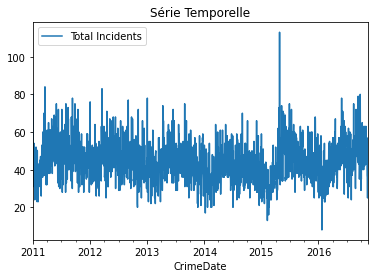

In [23]:
data1.plot(x = 'CrimeDate', y= 'Total Incidents', 
         title="Série Temporelle",)

<AxesSubplot:xlabel='CrimeDate', ylabel='Total Incidents'>

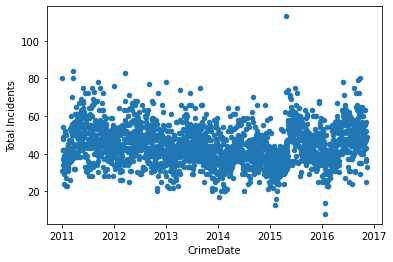

In [24]:
data1.plot.scatter(x='CrimeDate',
                      y='Total Incidents')

Text(0, 0.5, 'Fréquence')

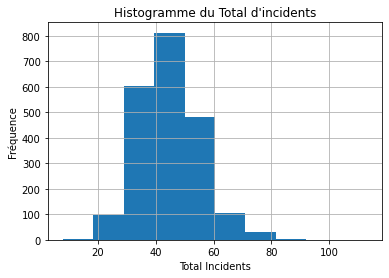

In [27]:
hist = data1['Total Incidents'].hist()
plt.title("Histogramme du Total d'incidents")
plt.xlabel("Total Incidents")
plt.ylabel('Fréquence')

#### Visualisation des données regroupés par heure

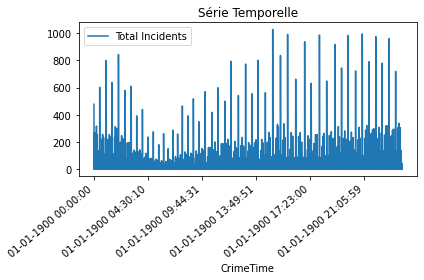

In [50]:
fig1 = data3.plot(x = 'CrimeTime', y= 'Total Incidents', 
         title="Série Temporelle",)
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=40, ha="right")
#sns.move_legend(fig1, "center right")
#plt.legend(labels=["Bourgogne-Franche-Comté","Occitanie","Île-de-France","Hauts-de-France","Auvergne-Rhône-Alpes","Nouvelle-Aquitane""Provence-Alpes-Côte d'Azur","Bretagne","Pays de la Loire","Normandie","Centre-Val de loire","Grand-Est","Corse","La Reunion","Martinique","Guadeloupe","Guyane","Mayotte","07","08","98"],title_fontsize = "2")
plt.tight_layout()

<AxesSubplot:xlabel='CrimeTime', ylabel='Total Incidents'>

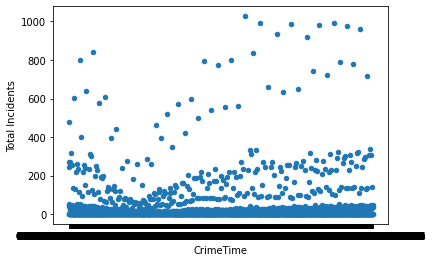

In [29]:
data3.plot.scatter(x='CrimeTime',
                      y='Total Incidents')

Text(0, 0.5, 'Fréquence')

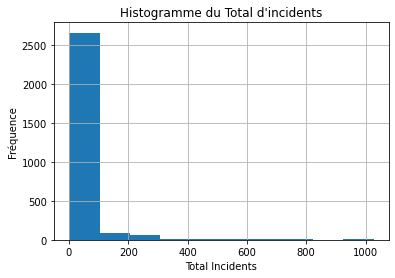

In [30]:
hist = data3['Total Incidents'].hist()
plt.title("Histogramme du Total d'incidents")
plt.xlabel("Total Incidents")
plt.ylabel('Fréquence')

In [31]:
data3['CrimeTime'][0:100]

0     01-01-1900 00:00:00
1     01-01-1900 00:00:11
2     01-01-1900 00:01:00
3     01-01-1900 00:02:00
4     01-01-1900 00:03:00
             ...         
95    01-01-1900 00:53:27
96    01-01-1900 00:54:00
97    01-01-1900 00:54:22
98    01-01-1900 00:54:46
99    01-01-1900 00:55:00
Name: CrimeTime, Length: 100, dtype: object

In [32]:
data3.shape

(2855, 3)

In [33]:
#len(data)
#data3.shape
#data3.info()

#### Détermination de l'arme la plus utilisé

In [34]:
#plt.bar(data['Weapon'],data['Total Incidents'])
#plt.bar(data['Weapon'])

In [35]:
data.Weapon.value_counts()

HANDS      50364
FIREARM    20847
OTHER      14077
KNIFE       9772
Name: Weapon, dtype: int64

C:\Users\MarieRogerNoahNoah\.conda\envs\regression\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weapon', ylabel='count'>

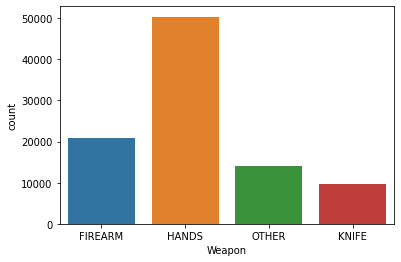

In [36]:
sns.countplot(data.Weapon)

In [37]:
# transformer la colonne date en colonne index
#data.set_index('CrimeDate',inplace=True)
#data

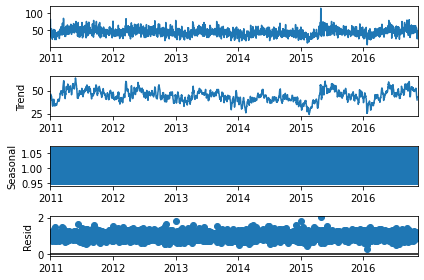

In [38]:
analysis = data2.copy()

decompose_result_mult = seasonal_decompose(analysis,model = 'multiplicative')
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

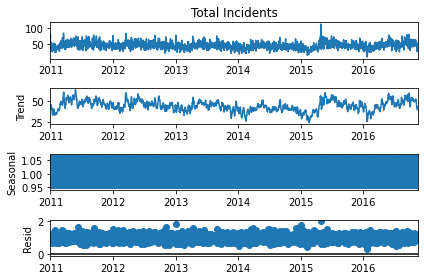

In [39]:
analysis = data2['Total Incidents'].copy()

decompose_result_mult = seasonal_decompose(analysis,model = 'multiplicative')
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [40]:
result = adfuller(data2['Total Incidents'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -4.233151117511494
p-value : 0.0005787451425118189
Valeurs Critiques :
	1%: -3.433436860843248
	5%: -2.862903651640104
	10%: -2.5674959426569046


In [41]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF :", dftest[0])
    print("2. p-value :", dftest[1])
    print("3. Num of Lags :", dftest[2])
    print("4. Num of Observation used for ADF Regression and Cristical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ",val)

In [42]:
ad_test(data2['Total Incidents'])

1. ADF : -4.233151117511494
2. p-value : 0.0005787451425118189
3. Num of Lags : 21
4. Num of Observation used for ADF Regression and Cristical Values Calculation : 2121
5. Critical Values :
	 1% :  -3.433436860843248
	 5% :  -2.862903651640104
	 10% :  -2.5674959426569046


C:\Users\MarieRogerNoahNoah\.conda\envs\regression\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


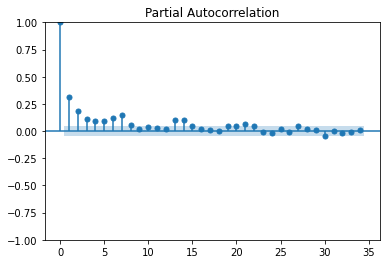

In [43]:
plot_pacf(data2);

In [45]:
model = sm.tsa.arima.ARIMA(data2, order=(0,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        Total Incidents   No. Observations:                 2143
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -7838.023
Date:                Mon, 13 Jun 2022   AIC                          15682.046
Time:                        23:07:58   BIC                          15699.054
Sample:                    01-01-2011   HQIC                         15688.269
                         - 11-12-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8402      0.020    -42.212      0.000      -0.879      -0.801
ma.L2         -0.0829      0.020     -4.089      0.000      -0.123      -0.043
sigma2        88.2065      1.963     44.928      0.0

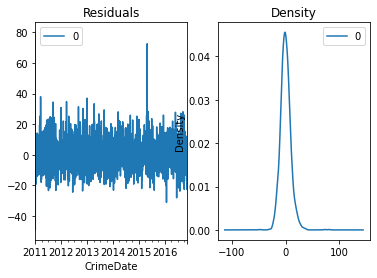

In [46]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()